# DSCI 512 Lecture 3: Recursion

Outline:

- Recursion intro
- Group activity
- Multiple recursive calls 
- Group activity

## Recursion intro

Below: credit for the idea goes to [Dan Garcia](https://people.eecs.berkeley.edu/~ddgarcia/) and specifically his [talk at UBC](https://www.youtube.com/watch?v=3QEGzSXB3mc) about his course called [The Beauty and Joy of Computing](https://bjc.berkeley.edu/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def move_pen(x, y, angle, length):
    new_x = x + length*np.sin(angle/180.0)
    new_y = y + length*np.cos(angle/180.0)
    return new_x, new_y

def branch(x, y, angle, length=1, marker="."):
#     plt.plot([old_x, x], [old_y, y], 'k')
    plt.plot(x, y, marker=marker, markersize="15", markerfacecolor="None", markeredgecolor="k")

def square(*args):
    return branch(*args, marker="s")

def hexagon(*args):
    return branch(*args, marker="h")

def star(*args, length=1):
    return branch(*args, marker="*")

def vee(x=0, y=0, angle=0, length=1):
    
    # possible shapes
    shapes = [square, hexagon, star, vee, vee]
    
    # branch left
    shape = np.random.choice(shapes)
    new_angle = angle - 20
    new_x, new_y = move_pen(x, y, new_angle, length)
    plt.plot([x, new_x], [y, new_y], 'k')
    shape(new_x, new_y, new_angle, length)
    
    # branch right
    shape = np.random.choice(shapes)
    new_angle = angle + 20
    new_x, new_y = move_pen(x, y, new_angle, length)
    plt.plot([x, new_x], [y, new_y], 'k')
    shape(new_x, new_y, new_angle, length)    
    
    plt.xticks(())
    plt.yticks(())
    plt.xlim((-2,2))
    plt.ylim((0,10))
#     plt.draw()
#     plt.pause(0.05)


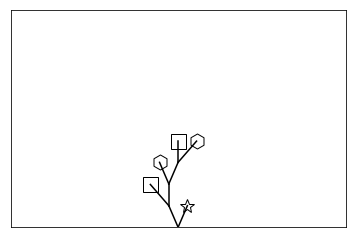

In [7]:
vee()

#### Step 1: functions with outputs but no inputs

Consider this function:

In [8]:
def h():
    return 0

We can call it:

In [9]:
h()

0

Now let's add a function `g` that calls `h`:

In [10]:
def g():
    return h() + 1

In [11]:
g()

1

- What's happening here? `g` is calling `h`, which returns $0$.
- It then adds this result, $0$, to $1$ and gets $1$.
- So it returns $1$.

Now let's add a function `f` that calls `g`:

In [12]:
def f():
    return g() + 1

In [13]:
f()

2

- What's happening here? `f` is calling `g`.
- We already know `g` returns $1$, so no need to go through that again.
- So `f` adds $1+1$, and returns $2$.

What's the idea here? That functions can call each other, and we can methodically "unpack" what happens when they call each other.

#### Step 2: functions with inputs but no outputs

Now let's make it more interesting by letting the functions take arguments. Consider these functions:

In [14]:
def h(n):
    print("You called h with argument", n)
    print("Ending h with argument", n)

In [15]:
h(3)

You called h with argument 3
Ending h with argument 3


In [18]:
h(2)

You called h with argument 2
Ending h with argument 2


In [19]:
def g(n):
    print("You called g with argument", n)
    h(n-1) # this line calls h but doesn't do anything with the result
    print("Ending g with argument", n)

In [20]:
g(1)

You called g with argument 1
You called h with argument 0
Ending h with argument 0
Ending g with argument 1


In [21]:
g(2)

You called g with argument 2
You called h with argument 1
Ending h with argument 1
Ending g with argument 2


In [22]:
g(3)

You called g with argument 3
You called h with argument 2
Ending h with argument 2
Ending g with argument 3


Ok, now let's add another function, `f`.

In [23]:
def f(n):
    print("You called f with argument", n)
    g(n-1) # this line calls g but doesn't do anything with the result
    print("Ending f with argument", n)

In [24]:
f(5)

You called f with argument 5
You called g with argument 4
You called h with argument 3
Ending h with argument 3
Ending g with argument 4
Ending f with argument 5


In [ ]:
f(10)

FYI (optional): what we're seeing above is a depiction of the functions' [call stack](https://en.wikipedia.org/wiki/Call_stack). 

#### Step 3: functions with inputs _and_ outputs

Above, each function is passing data _into_ the next function.

Below, we try passing data _out_ of each function as well.

In [25]:
def h(n):
    print("Starting h with argument", n)
    value = 0
    print("Ending h with value", value)
    return value

In [26]:
h(5)

Starting h with argument 5
Ending h with value 0


0

`h` is a weird function that ignores its input and just returns 0.

Below, `g` calls `h` will a smaller value of `n`, and then adds 1 to the result.

In [27]:
def g(n):
    print("Starting g with argument", n)
    value = h(n-1) + 1
    print("Ending g with value", value)
    return value

In [28]:
g(10)

Starting g with argument 10
Starting h with argument 9
Ending h with value 0
Ending g with value 1


1

Let's look at the _order_ of the print statements:

1. We start `g`
2. We start `h`
3. We end `h`
4. We end `g`

This is critical to understanding what happens next.

In [29]:
def f(n):
    print("Starting f with argument", n)
    value = g(n-1) + 1
    print("Ending f with value", value)
    return value

In [30]:
f(11)

Starting f with argument 11
Starting g with argument 10
Starting h with argument 9
Ending h with value 0
Ending g with value 1
Ending f with value 2


2

Let's remove some of the print statements to make things more compact:

In [31]:
def f(n):
    print("Starting f with argument", n)
    return g(n-1) + 1

def g(n):
    print("Starting g with argument", n)
    return h(n-1) + 1

def h(n):
    print("Starting h with argument", n)
    return 0

In [32]:
f(11)

Starting f with argument 11
Starting g with argument 10
Starting h with argument 9


2

So far, this isn't interesting because we're not using `n` for anything. We get the same result, $2$, for any value of `n`:

In [33]:
f(1000)

Starting f with argument 1000
Starting g with argument 999
Starting h with argument 998


2

Now look at this code (we're getting close to the punch line):

In [34]:
def f(n):
    print("Starting f with argument", n)
    if n == 0:
        return 0
    else:
        return g(n-1) + 1

def g(n):
    print("Starting g with argument", n)
    if n == 0:
        return 0
    else:
        return h(n-1) + 1

def h(n):
    print("Starting h with argument", n)
    if n == 0:
        return 0
    else:
        return i(n-1)

# ...
# ...

This code actually uses `n`. Here's what it `f` outputs

|  `n`   |   `f(n)` |
|--------|--------|
| 0      |    0   |
| 1      |    1   |
| 2      |    2   |
| 3+     | error  |


In [35]:
f(0)

Starting f with argument 0


0

In [36]:
f(1)

Starting f with argument 1
Starting g with argument 0


1

In [37]:
f(2)

Starting f with argument 2
Starting g with argument 1
Starting h with argument 0


2

In [38]:
f(3)

Starting f with argument 3
Starting g with argument 2
Starting h with argument 1


NameError: name 'i' is not defined

And now the key insight: all of the functions above are _exactly the same_. They check if `n` is zero. If so, they return zero. Otherwise, they call a function _identical to themselves_ with argument `n-1`, add `1` to the result, and return it.

So why write

In [ ]:
def f(n):
    if n == 0:
        return 0
    else:
        return g(n-1) + 1

# def g(n):
#     ...
#     
# def h(n):
#     ...

a million times when you can just write

In [39]:
def f(n):
    if n == 0:
        return 0
    else:
        return f(n-1) + 1

BAM! Recursion. 

- It is just incidental that all the functions have the same name, `f`. 
- It may be helpful for you to think of them as separate. 
- They do live in separate universes, with separate variables, like `n` and all other variables. 
- The fact that they are all named `f` is just a matter of convenience, to avoid writing an infinite amount of code.

In [40]:
f(5)

5

Let's put our print string back in...

In [41]:
def f(n):
    print("Starting f with argument", n)
    if n == 0:
        print("Ending f with n =", n, "and returning 0 (base case)");
        return 0
    else:
        value = f(n-1) + 1
        print("Ending f with n =", n, "and returning", value);
        return value

In [42]:
f(2)

Starting f with argument 2
Starting f with argument 1
Starting f with argument 0
Ending f with n = 0 and returning 0 (base case)
Ending f with n = 1 and returning 1
Ending f with n = 2 and returning 2


2

- Does this look familiar? It's the same "call stack" we saw before with our `f`, `g`, and `h`. Except now all the functions are named `f`. 
- The `if n == 0` part of the code is called the _base case_. This is like the function `h` earlier. It is the function that does _not_ call itself, and it's what causes the recursion to terminate.
- The call to itself, in this case `f(n-1)` is the recursive step.

In [43]:
f(5)

Starting f with argument 5
Starting f with argument 4
Starting f with argument 3
Starting f with argument 2
Starting f with argument 1
Starting f with argument 0
Ending f with n = 0 and returning 0 (base case)
Ending f with n = 1 and returning 1
Ending f with n = 2 and returning 2
Ending f with n = 3 and returning 3
Ending f with n = 4 and returning 4
Ending f with n = 5 and returning 5


5

## Binary search, revisited

- Let's return to binary search from last class.
- Here is a case where recursion works beautifully.
- Compare with the messy code from Lecture 2.

In [44]:
def binary_search(data, key):
    """
    Returns True of key is in data, otherwise False.
    data must be sorted.
    
    Arguments:
    data -- (list) the *sorted* list of elements in which we are searching
    key -- the item to search for
    """
    if len(data) == 1:
        return data[0] == key   

    mid = len(data)//2
    if key < data[mid]:
        return binary_search(data[:mid], key)
    else:
        return binary_search(data[mid:], key)

In [45]:
data = [-12,4,7,9,45,987,987,1000,2000]

# Test cases for binary search
# key is the first element in the list
assert binary_search(data, -12)

# key is the last element in the list
assert binary_search(data, 2000)

# key is the middle element in the list
assert binary_search(data, 45)

# key occurs multiple times in the list
assert binary_search(data, 987)

# key is larger than the largest element in the list
assert not binary_search(data, 3000)

# key is smaller than the smallest element in the list
assert not binary_search(data, -18)
print("Success!")

Success!


So elegant!!

## Group activity

Consider the code below:

In [ ]:
def f(n):
    ''' n must be greater'''
    if n == 0:
        return ""
    elif n == 3:
        return "b" + f(n-1) + "c"
    else:
        return "a" + f(n-1)

**Without running the code**, fill in the table for what `f` returns:

|  `n`   |   `f(n)` |
|--------|--------|
| -1     |undefined|
| 0      |        |
| 1      |    a   |
| 2      |   aa   |
| 3      |  baac  |
| 4      |  abaac   |
| 5      |  aabaac  |

## Multiple recursive calls

Consider the function below.

In [46]:
def f(n):
    if n == 1 or n == 2:
        return 1
    return f(n-1) + f(n-2)

What is returned by `f(3)`?
What is returned by `f(4)`?


In [47]:
f(4)

3

In [48]:
def f(n):
    print("Starting f with argument", n);
    if n == 1 or n == 2:
        return 1
    return f(n-1) + f(n-2)

In [49]:
f(4)

Starting f with argument 4
Starting f with argument 3
Starting f with argument 2
Starting f with argument 1
Starting f with argument 2


3

Note this is equivalent to:

In [ ]:
def f(n):
    print("Starting f with argument", n);
    if n == 1 or n == 2:
        return 1
    val1 = f(n-1)
    val2 = f(n-2)
    return val1 + val2

f(4)

In other words, there's no significance to the two recursive calls being on the same line.

Let's draw out the execution tree.

- First, `f(4)` is called.
- The first thing it does is call `f(n-1) = f(3)`

![](recursion-example/1s.png)

- The first thing `f(3)` does is call `f(n-1)=f(2)`.

![](recursion-example/2s.png)

- `f(2)` triggers the base case and immediately returns $1$.

![](recursion-example/3s.png)

- The return value $1$ is passed back up to `f(3)`. 
- `f(3)` is trying to call `f(n-1) + f(n-2)`, and the first of those has just returned with value $1$.
- So it now proceeds to call the second one, namely `f(n-2)` or `f(1)`.

![](recursion-example/4s.png)

- `f(1)` triggers the base case and immediately returns $1$.
- The return value $1$ is passed back up to `f(3)`. 

![](recursion-example/5s.png)

- `f(3)` is now done, because it has computed $f(n-1) + f(n-2) = 1 + 1 = 2$

![](recursion-example/6s.png)

- It passes this value, $2$ up to its caller, namely `f(4)`.
- `f(4)` is trying to call `f(n-1) + f(n-2)`, and the first of those has just returned with value $2$.
- So it now proceeds to call the second one, namely `f(n-2)` or `f(2)`.

![](recursion-example/7s.png)

- `f(2)` triggers the base case and immediately returns $1$.

![](recursion-example/8s.png)

- $f(4)$ is now done, because it has computed $f(n-1) + f(n-2) = 2 + 1 = 3$

![](recursion-example/9s.png)

- The function above implements the [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number): $F_n=F_{n-1}+F_{n-2}$.
- In this case we need 2 base cases to get things started, because $F_n$ depends on the previous 2 steps.
- Recursive functions don't need to be sequences, as we'll see.
- The time complexity here is something like $O(2^n)$ (slightly less than $2^n$ steps but close enough).
- This is not a good implementation for the Fibonacci numbers!

Let's look at a different kind of algorithm with multiple recursive calls. 

Mergesort is a divide-and-conquer sorting algorithm which uses recursion. It sorts by splitting lists in half, sorting them independently, then merging them. The base case is a list of one element, which is always trivially sorted.

Don't worry about the merge helper function (except to note that it is accomplished in single loop which iterates over both lists simultaneously), the interesting recursive part is in the main mergesort.

In [50]:
import random

def merge(L1,L2):
    ''' merge two sorted lists into a single sorted list'''
    L = []
    i = 0
    j = 0
    while i < len(L1) and j < len(L2):
        if L1[i] < L2[j]:
            L.append(L1[i])
            i += 1
        else:
            L.append(L2[j])
            j += 1
    if i < len(L1):
        L.extend(L1[i:])
    elif j < len(L2):
        L.extend(L2[j:])
    return L
        
def mergesort(L):
    if len(L) == 1:
        print("base case", L)
        return L
         
    print("mergesorting ",L)
    mid_ind = len(L) // 2
    L1 = L[:mid_ind]
    L2 = L[mid_ind:]
    print("divided into ", L1, "and", L2, "for sorting")
    L1 = mergesort(L1)
    L2 = mergesort(L2)
    print("merging ", L1, "and", L2)
    L = merge(L1,L2)
    print("returning sorted", L)
    return L

data = [-12,4,7,9,45,45,987,1000,2000]
random.shuffle(data)
mergesort(data)

mergesorting  [7, 2000, 9, 4, 1000, 45, -12, 987, 45]
divided into  [7, 2000, 9, 4] and [1000, 45, -12, 987, 45] for sorting
mergesorting  [7, 2000, 9, 4]
divided into  [7, 2000] and [9, 4] for sorting
mergesorting  [7, 2000]
divided into  [7] and [2000] for sorting
base case [7]
base case [2000]
merging  [7] and [2000]
returning sorted [7, 2000]
mergesorting  [9, 4]
divided into  [9] and [4] for sorting
base case [9]
base case [4]
merging  [9] and [4]
returning sorted [4, 9]
merging  [7, 2000] and [4, 9]
returning sorted [4, 7, 9, 2000]
mergesorting  [1000, 45, -12, 987, 45]
divided into  [1000, 45] and [-12, 987, 45] for sorting
mergesorting  [1000, 45]
divided into  [1000] and [45] for sorting
base case [1000]
base case [45]
merging  [1000] and [45]
returning sorted [45, 1000]
mergesorting  [-12, 987, 45]
divided into  [-12] and [987, 45] for sorting
base case [-12]
mergesorting  [987, 45]
divided into  [987] and [45] for sorting
base case [987]
base case [45]
merging  [987] and [45

[-12, 4, 7, 9, 45, 45, 987, 1000, 2000]

**Question:** What's the complexity of mergesort? Can you explain why?

**Answer:** As mentioned last lecture, it's $O(n\log n)$. It's actually easy to see why if you look at the representation of the process below

\[-12, 4, 7, 9, 45, 987, 1000, 2000\] <br>
\[-12, 7, 45, 1000\] \[4, 9, 45, 987, 2000\] <br>
\[7, 45\] \[-12, 1000\] \[45, 987\] \[9, 2000\] <br>
\[45\] \[7\] \[-12\] \[1000\] \[45\] \[987\] \[9\] \[2000\]

To step from each line to the one above it, there is a one or more calls to `merge` that we know can be accomplished in the equivalent of one single pass over the data, i.e. $O(n)$. There are $3$ such steps here for an input size of $8$, (i.e. $2^3$); generally the number of such steps in a mergesort will be $\log n$, and so the overall complexity is $O(n\log n)$


## Group activity

Consider the code below:

In [ ]:
def f(n):
    if n < 3:
        return 1
    if f(n-1) > f(n-2):
        return f(n-2) - 1
    else:
        return f(n-3) + 1

**Without running the code**, fill in the table for what `f` returns:

|  `n`   |   `f(n)` |
|--------|--------|
| 0      |    1   |
| 1      |    1   |
| 2      |    1   |
| 3      |    2   |
| 4      |    0   |
| 5      |    2   |
| 6      |    -1  |
| 7      |    1   |
| 8      |    -2  |